In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

img_height, img_width = 28, 28
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    'dataset/',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    'dataset/',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

num_classes = len(train_generator.class_indices)
print(f"Number of classes (letters): {num_classes}")

Found 9194 images belonging to 64 classes.
Found 2274 images belonging to 64 classes.
Number of classes (letters): 64


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,000 (906.25 KB)

 Trainable params: 232,000 (906.25 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.1387 - loss: 3.7469 - val_accuracy: 0.3672 - val_loss: 2.1723
Epoch 2/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.3277 - loss: 2.1370 - val_accuracy: 0.4947 - val_loss: 1.3445
Epoch 3/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.4556 - loss: 1.5437 - val_accuracy: 0.5695 - val_loss: 1.1000
Epoch 4/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.5197 - loss: 1.2668 - val_accuracy: 0.5836 - val_loss: 0.9800
Epoch 5/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.5811 - loss: 1.0825 - val_accuracy: 0.6064 - val_loss: 0.9334
Epoch 6/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.6219 - loss: 0.9662 - val_accuracy: 0.6201 - val_loss: 0.8784
Epoch 7/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.6424 - loss: 0.8951 - val_accuracy: 0.6240 - val_loss: 0.8741
Epoch 8/10
288/288 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.6531 - loss: 0.8285 - val_acc

In [16]:
model.save('letter_recognizer_model.keras')

In [17]:
from tensorflow.keras.preprocessing import image

img_path = 'test letter.png'
img = image.load_img(img_path, target_size=(img_height, img_width), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
labels = list(train_generator.class_indices.keys())
predicted_letter = labels[predicted_class_index]

print(f"Predicted Letter: {predicted_letter}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted Letter: we_wi


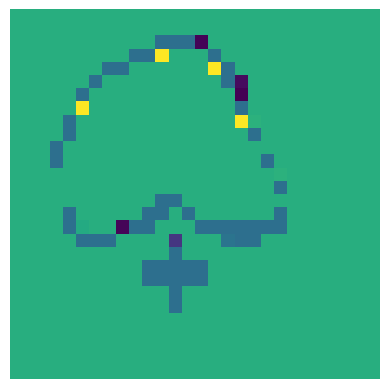

In [18]:
plt.imshow(img)
plt.axis('off')
plt.show()